## 1. Anomaly Detection (30 points)

**Part A (5 Points):**

By dividing a data set into quartiles, IQR is used to measure variability. The data is sorted ascending and divided into four equal parts. Q1, Q2, Q3, also known as the first, second, and third quartiles, are the values that separate the four equal parts.

Use the following data points to calculate outliers in the data
data = [11, 3, 8, 10, 12, 5, 1, 50]

Using a box plot, show the outliers in the box plot.

**Part B (5 points):**

Using the formula to calculate the Z-score detect outliers in the following data points.
data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]
Using a box plot, show the outliers in the box plot.

**Part C (20 points):**

Use the dataset attached for identifying the outliers using Z-score. 

Steps to follow in this question

- Step1(5 points): Show outliers using histograms and scatterplots. Then 

- Step2(7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

- Step3(4 points): Print the number of outliers removed.

- Step4(4 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import norm

In [2]:
def finding_upper_lower_bound(data):
    q1, q3 = np.percentile(data, [25, 75])
    
    # get lower and upper bound
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    
    # get outliers
    outliers_x = []
    outliers_y = []
    i = 1
    for i in range(len(data)):
        if data[i] > upper_limit or data[i] < lower_limit:
            outliers_x.append(i)
            outliers_y.append(data[i])
    outliers_return = {'outliers_x': outliers_x,
                       'outliers_y': outliers_y,
                       'upper_limit': upper_limit,
                       'lower_limit': lower_limit}
    
    return outliers_return

In [3]:
# Create a box plot with outliers
def create_box_plot(data, title, ylable):
    fig, ax = plt.subplots()
    ax.boxplot(data, whis=1.5, showfliers=True)
    ax.set_title(title)
    ax.set_ylabel(ylable)
    plt.show()

Outliers of data set: [11, 3, 8, 10, 12, 5, 1, 50] is [50]


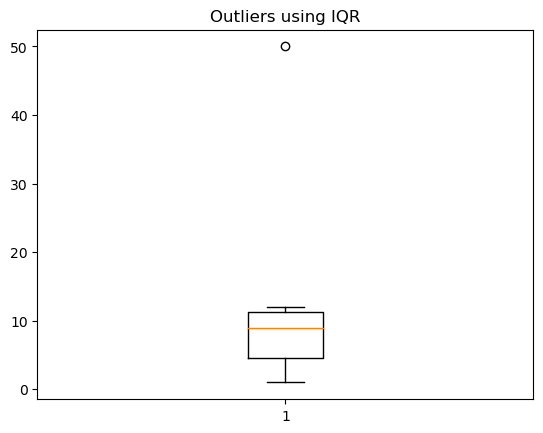

In [4]:
# --------------------------- PART A ----------------------------------------
# to calculate outliers in the data = [11, 3, 8, 10, 12, 5, 1, 50]
data = [11, 3, 8, 10, 12, 5, 1, 50]
result = finding_upper_lower_bound(data)
print(f'Outliers of data set: {data} is {result["outliers_y"]}')

create_box_plot(data, 'Outliers using IQR', '')

In [5]:
def z_score(data, thresholds):
    mean = np.mean(data)
    std = np.std(data)
    zscores = [(value - mean) / std for value in data]

    outliers = [data[i] for i, z in enumerate(zscores) if abs(z) > thresholds]
    
    dict_result = {'z_score': zscores,
                   'outliers': outliers,
                   'mean': mean,
                   'std': std}
    return dict_result

outliers of data set: [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3] is [50]


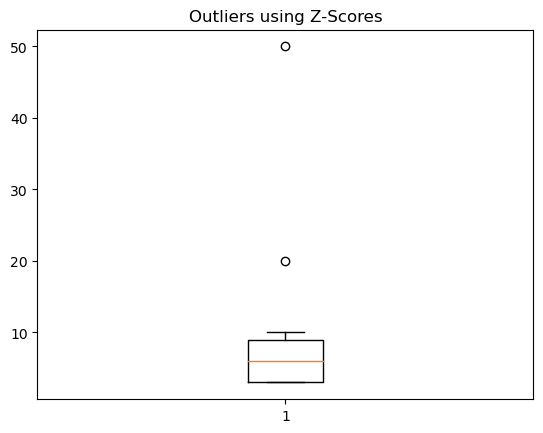

In [6]:
#---------------------------------- Part 2 -----------------------------------------
data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]
threshold = 3
result = z_score(data, threshold)
print(f"outliers of data set: {data} is {result['outliers']}")

create_box_plot(data, 'Outliers using Z-Scores', '')

**Part C (20 points):**

In [7]:
# Step1(5 points): Show outliers using histograms and scatterplots.
# Assuming this is histogram and scatterplots on SalePrice and LotArea

In [8]:
# Load the dataset (replace "filename.csv" with your actual file name and path)
data = pd.read_csv("Q1_dataset.csv")

In [9]:
# Extract the saleprice data as a list
saleprices = data["SalePrice"].tolist()

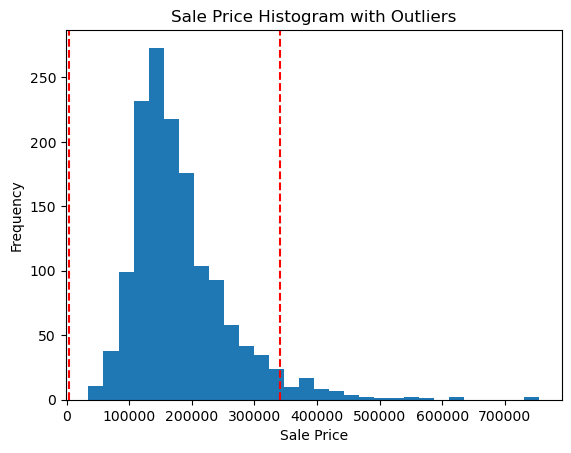

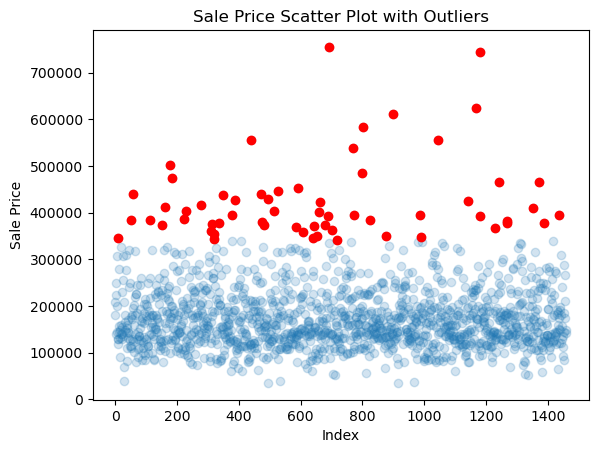

In [10]:
# ---------------------------- Calculate for SalePrice ---------------------------------
result_saleprice = finding_upper_lower_bound(data["SalePrice"])
upper_limit_saleprice = result_saleprice['upper_limit']
lower_limit_saleprice = result_saleprice['lower_limit']
outliers_x_saleprice = result_saleprice['outliers_x']
outliers_y_saleprice = result_saleprice['outliers_y']

# Create the histogram with outliers highlighted
plt.hist(saleprices, bins=30)
plt.axvline(x=upper_limit_saleprice, color="red", linestyle="--")
plt.axvline(x=lower_limit_saleprice, color="red", linestyle="--")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Sale Price Histogram with Outliers")
plt.show()

# create scatter plot
plt.scatter(range(len(saleprices)), saleprices, alpha=0.2)
plt.scatter(outliers_x_saleprice, outliers_y_saleprice, color="red")
plt.xlabel("Index")
plt.ylabel("Sale Price")
plt.title("Sale Price Scatter Plot with Outliers")

# Show the plot
plt.show()


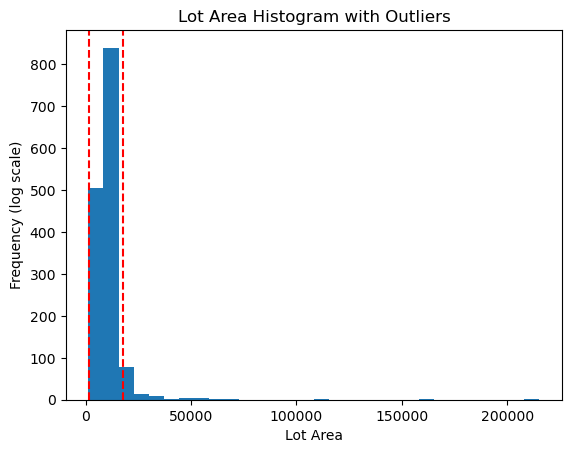

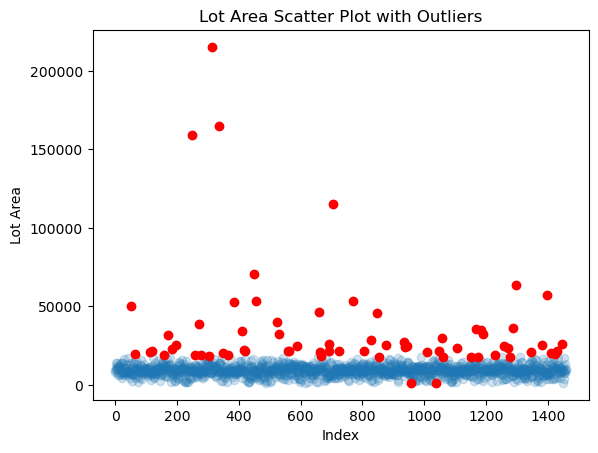

In [11]:
# ---------------------------- Calculate for LotArea ---------------------------------
# Extract the saleprice data as a list
lotarea = data["LotArea"].tolist()
result_lotarea = finding_upper_lower_bound(data["LotArea"])
upper_limit_lotarea = result_lotarea['upper_limit']
lower_limit_lotarea = result_lotarea['lower_limit']
outliers_x_lotarea = result_lotarea['outliers_x']
outliers_y_lotarea = result_lotarea['outliers_y']

# Create the histogram with outliers highlighted
plt.hist(lotarea, bins=30)
plt.axvline(x=upper_limit_lotarea, color="red", linestyle="--")
plt.axvline(x=lower_limit_lotarea, color="red", linestyle="--")
plt.xlabel("Lot Area")
plt.ylabel("Frequency (log scale)")
plt.title("Lot Area Histogram with Outliers")
plt.show()

# create scatter plot
plt.scatter(range(len(lotarea)), lotarea, alpha=0.2)
plt.scatter(outliers_x_lotarea, outliers_y_lotarea, color="red")
plt.xlabel("Index")
plt.ylabel("Lot Area")
plt.title("Lot Area Scatter Plot with Outliers")

# Show the plot
plt.show()


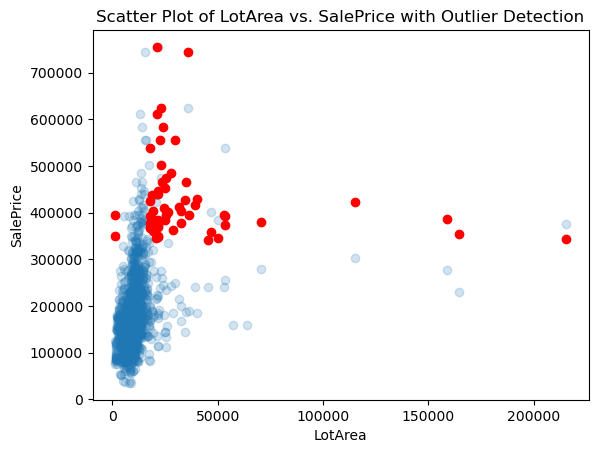

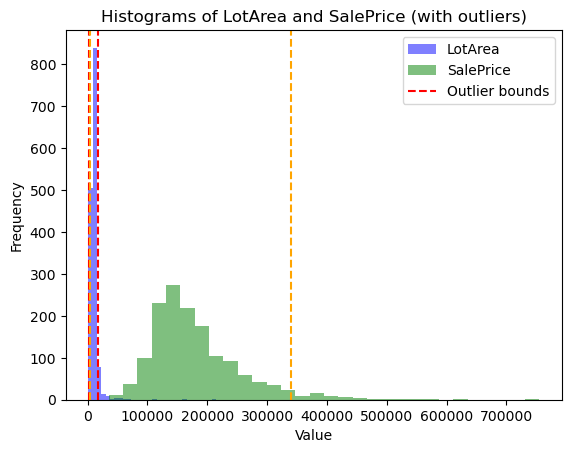

In [12]:
# I am not sure if the question want me to put the graph together or seperate but if it is together, then the below
# code will combind the lotarea together with sale price in the same graph

# Identify the outliers using the threshold
outliers_LotArea_x = outliers_x_lotarea
outliers_LotArea = outliers_y_lotarea

outliers_SalePrice_x = outliers_x_saleprice
outliers_SalePrice = outliers_y_saleprice

# ------------------------ Scatter plot --------------------
# Create the scatter plot with outliers marked in red
fig, ax = plt.subplots()
ax.scatter(data["LotArea"], data["SalePrice"], alpha=0.2)

# checking in case the len of outliers in x and y axis are not the same
if len(outliers_LotArea) > len(outliers_SalePrice):
    outliers_LotArea = outliers_LotArea[:len(outliers_SalePrice)]
else:
    outliers_SalePrice = outliers_SalePrice[:outliers_LotArea]

ax.scatter(outliers_LotArea, outliers_SalePrice, c='r') 
ax.set_xlabel('LotArea')
ax.set_ylabel('SalePrice')
ax.set_title('Scatter Plot of LotArea vs. SalePrice with Outlier Detection')
plt.show()

# ---------------- histogram -----------------------------
# Create the Boolean mask to identify the outliers
mask_lot_area = (data["LotArea"] > lower_limit_lotarea) & (data["LotArea"] < upper_limit_lotarea)
mask_sale_price = (data["SalePrice"] > lower_limit_saleprice) & (data["SalePrice"] < upper_limit_saleprice)

# Create the histograms with outliers
plt.hist(data["LotArea"], bins=30, alpha=0.5, color='blue', label='LotArea')
plt.hist(data["SalePrice"], bins=30, alpha=0.5, color='green', label='SalePrice')
plt.title('Histograms of LotArea and SalePrice (with outliers)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.axvline(x=lower_limit_lotarea, color='red', linestyle='--', label='Outlier bounds')
plt.axvline(x=upper_limit_lotarea, color='red', linestyle='--')
plt.axvline(x=lower_limit_saleprice, color='orange', linestyle='--')
plt.axvline(x=upper_limit_saleprice, color='orange', linestyle='--')
plt.legend()
plt.show()

In [13]:
# --- Step2(7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds---
thresholds = [2, 2.5, 3, 3.5]

for threshold in thresholds:   
    result = z_score(saleprices, threshold)
    outliers = result['outliers']
    print("Threshold:", threshold, "- Number of outliers:", len(outliers), '\n', outliers, '\n')
    

Threshold: 2 - Number of outliers: 63 
 [345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000, 386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426, 437154, 340000, 394432, 426000, 555000, 440000, 380000, 374000, 430000, 402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000, 402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000, 395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000, 556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500, 381000, 410000, 466500, 377500, 340000, 394617] 

Threshold: 2.5 - Number of outliers: 40 
 [385000, 438780, 383970, 412500, 501837, 475000, 386250, 403000, 415298, 437154, 394432, 426000, 555000, 440000, 380000, 430000, 402861, 446261, 451950, 402000, 423000, 392000, 755000, 538000, 395000, 485000, 582933, 385000, 611657, 395192, 556581, 424870, 625000, 392500, 745000, 465000, 381000, 410000, 466500, 394617] 

Threshold: 3 - Number of outliers: 22 
 [438780, 501837, 475000, 437154, 426000, 555000,

In [14]:
# Step3(4 points): Print the number of outliers removed.
# Set the thresholds for identifying outliers
thresholds = [2, 2.5, 3, 3.5]

# Loop through each threshold, identify and remove outliers, and print the number of outliers removed
for threshold in thresholds:
    # Calculate the Z-scores for the SalePrice column
    z_scores = np.abs((data["SalePrice"] - data["SalePrice"].mean()) / data["SalePrice"].std())
    # Identify and remove outliers
    outliers = data[z_scores > threshold]["SalePrice"]
    data = data[z_scores <= threshold]
    # Print the number of outliers removed
    print("Threshold:", threshold, "- Number of outliers removed:", len(outliers))


Threshold: 2 - Number of outliers removed: 63
Threshold: 2.5 - Number of outliers removed: 27
Threshold: 3 - Number of outliers removed: 0
Threshold: 3.5 - Number of outliers removed: 0


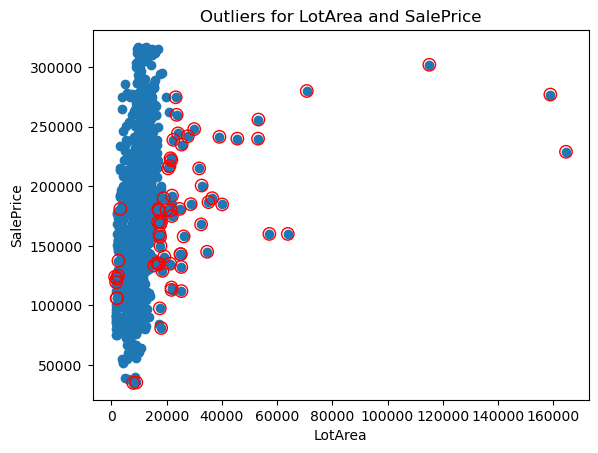

In [15]:
# Step4(4 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.
# Define the columns to use
cols = ["LotArea", "SalePrice"]

# Create a scatter plot of the columns
plt.scatter(data[cols[0]], data[cols[1]])

# Fit the Local Outlier Factor model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = clf.fit_predict(data[cols])

# Identify the outliers
outliers = data[y_pred == -1]

# Create a scatter plot of the outliers
plt.scatter(outliers[cols[0]], outliers[cols[1]], edgecolors='r', facecolors='none', s=80)

# Add labels and title to the plot
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.title("Outliers for " + cols[0] + " and " + cols[1])

# Show the plot
plt.show()


## 2. PCA (35 points)

Accuracy Comparison for Logistic Regression model: before and after PCA.
Please follow the following steps:

  1. Seperate and standardize the disease classification dataset. (5 points)
  2. Do Eigen decomposition using any LA library of your choice. Display scree plot. (10 points)
  3. Primary Component Selection. (Select the first 6 components) (5 points)
  4. Projection in a New Feature Space. (5 points)
  5. Principal Component Analysis. (5 points)
  6. Compare the presision and recall for the data using logistic regression before and after PCA. (10 points)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
#-----1. Seperate and standardize the disease classification dataset. (5 points)

data = pd.read_csv('Q2_dataset.csv')
# Separate the features and target variable
X = data.drop('class', axis=1) # features
y = data['class'] # target variable

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [18]:
X_std.mean(axis = 0)

array([ 0.00000000e+00, -1.97372982e-16,  9.11675203e-16, -1.40510766e-15,
       -2.81961403e-17, -6.57909941e-17, -1.69176842e-16, -1.22183275e-16,
        3.75948537e-17,  1.87974269e-17, -1.12784561e-16,  6.10916373e-17,
       -4.69935672e-18,  9.39871344e-18, -5.40426023e-17, -2.34967836e-17,
        1.87974269e-17,  8.92877776e-17, -2.81961403e-16,  5.87419590e-17,
       -9.63368127e-16, -1.40980702e-17,  2.49065906e-16, -1.01036169e-16,
        9.70417162e-16,  4.13543391e-16, -4.69935672e-18,  6.76707367e-16,
       -2.86660760e-16,  2.44366549e-16, -1.40980702e-17, -4.46438888e-17,
        6.10916373e-17, -7.04903508e-17, -6.81406724e-16, -1.87974269e-17,
       -4.69935672e-18,  9.39871344e-17,  1.43330380e-16, -9.86864911e-17,
       -3.38353684e-16,  5.59223449e-16,  1.56018643e-15, -5.16929239e-17,
       -1.22183275e-16,  2.34967836e-17, -1.50379415e-16,  3.28954970e-17,
        1.35341473e-15,  7.75393858e-16,  2.58464619e-17,  3.05458187e-17,
        4.22942105e-17,  

In [19]:
X_std.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

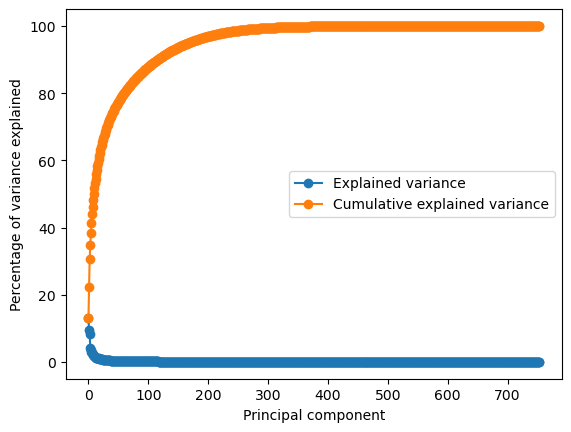

In [20]:
# 2. Do Eigen decomposition using any LA library of your choice. Display scree plot. (10 points)
# Calculate the covariance matrix
covariance_matrix = np.cov(X_std.T)

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort the eigenvalues in decreasing order
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Calculate the explained variance and cumulative explained variance
explained_variance = (eigenvalues / np.sum(eigenvalues)) * 100
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the scree plot
plt.plot(explained_variance, 'o-', label='Explained variance')
plt.plot(cumulative_explained_variance, 'o-', label='Cumulative explained variance')
plt.xlabel('Principal component')
plt.ylabel('Percentage of variance explained')
plt.legend()
plt.show()


In [21]:
# 3. Primary Component Selection. (Select the first 6 components) (5 points)
n_components = 6
eigenvectors_subset = eigenvectors[:, :n_components]

In [22]:
# 4. Projection in a New Feature Space. (5 points)
# Transform the standardized data to the new feature space
X_pca = np.dot(X, eigenvectors_subset)

In [23]:
# 5. Principal component analysis
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_std)

In [24]:
# 6. Compare the presision and recall for the data using logistic regression before and after PCA. (10 points)

# Standardize the features is done on top already

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Logistic Regression without PCA
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Calculate precision and recall for Logistic Regression without PCA
from sklearn.metrics import precision_score, recall_score
y_pred_lr = lr.predict(X_test)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
print("Logistic Regression without PCA - Precision: {:.3f}, Recall: {:.3f}".format(precision_lr, recall_lr))

# PCA
# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression with PCA
lr_pca = LogisticRegression(random_state=42)
lr_pca.fit(X_train_pca, y_train)

# Calculate precision and recall for Logistic Regression with PCA
y_pred_lr_pca = lr_pca.predict(X_test_pca)
precision_lr_pca = precision_score(y_test, y_pred_lr_pca)
recall_lr_pca = recall_score(y_test, y_pred_lr_pca)
print("Logistic Regression with PCA - Precision: {:.3f}, Recall: {:.3f}".format(precision_lr_pca, recall_lr_pca))


Logistic Regression without PCA - Precision: 0.898, Recall: 0.930
Logistic Regression with PCA - Precision: 0.866, Recall: 0.965


C:\Users\Leaksmy Heng\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3. EM Algorithm (35 points)

Etimate the probability distribution in a 1-dimensional dataset
There are two Normal distributions  𝑁(𝜇1,𝜎1^2) and 𝑁(𝜇2,𝜎2^2).
There are 5 paramaters to estimate: 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) where 𝑤 is the probability that the data comes from the first normal probability distribution and (1-𝑤) comes from the second normal probability distribution.
The probability density function (PDF) of the mixture model is: 𝑓(𝑥|𝜃)=𝑤 𝑓1(𝑥 | 𝜇1,𝜎1^2)+(1−𝑤) 𝑓2(𝑥 | 𝜇2,𝜎2^2)
Your goal is to best fit a given probability density by finding 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) through EM iterations.

Using the following way to produce data:
```python
import numpy as np
random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

```

(1) Using a single Gaussion to estimate and draw a picure to see the result: (5 points)
```python
class Gaussian:
"Model univariate Gaussian"
def __init__(self, mu, sigma):
    #mean and standard deviation


#probability density function
def pdf(self, datum):
    "Probability of a data point given the current parameters"
```

(2) Using a 2 Gaussian mixture model to estimate and draw a picture to see the result(Do not use sklearn GaussianMixture): (30 points)
```python
class GaussianMixture_self:
"Model mixture of two univariate Gaussians and their EM estimation"

def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):


def Estep(self):
    "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"

def Mstep(self, weights):
    "Perform an M(aximization)-step"

def iterate(self, N=1, verbose=False):
    "Perform N iterations, then compute log-likelihood"

def pdf(self, x):
        
```

In [25]:
# ---- (1) Using a single Gaussion to estimate and draw a picure to see the result: (5 points)--------

class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (np.sqrt(2 * np.pi) * abs(self.sigma))) * np.exp(-u * u / 2)
        return y

In [26]:
# (2) Using a 2 Gaussian mixture model to estimate and draw a picture to see 
# the result(Do not use sklearn GaussianMixture): (30 points)

class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=None, mu_max=None, sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        self.mu_min = mu_min or min(data)
        self.mu_max = mu_max or max(data)
        self.sigma_min = sigma_min
        self.sigma_max = sigma_max
        self.mix = mix
        self.mu1 = np.random.uniform(self.mu_min, self.mu_max)
        self.mu2 = np.random.uniform(self.mu_min, self.mu_max)
        self.sigma1 = np.random.uniform(self.sigma_min, self.sigma_max)
        self.sigma2 = np.random.uniform(self.sigma_min, self.sigma_max)

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
        # calculate probabilities of each point belonging to Gaussian 1 or Gaussian 2
        pdf1 = norm(self.mu1, self.sigma1).pdf(self.data)
        pdf2 = norm(self.mu2, self.sigma2).pdf(self.data)
        self.weights = self.mix * pdf1 / (self.mix * pdf1 + (1 - self.mix) * pdf2)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # calculate weighted means and standard deviations
        sum_weights = np.sum(weights)
        self.mix = sum_weights / len(self.data)
        self.mu1 = np.sum(weights * self.data) / sum_weights
        self.mu2 = np.sum((1 - weights) * self.data) / (len(self.data) - sum_weights)
        self.sigma1 = np.sqrt(np.sum(weights * (self.data - self.mu1)**2) / sum_weights)
        self.sigma2 = np.sqrt(np.sum((1 - weights) * (self.data - self.mu2)**2) / (len(self.data) - sum_weights))

    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        self.log_likelihoods = []
        for i in range(N):
            self.Estep()
            self.Mstep(self.weights)
            log_likelihood = np.sum(np.log(self.mix * norm(self.mu1, self.sigma1).pdf(self.data) + (1 - self.mix) * norm(self.mu2, self.sigma2).pdf(self.data)))
            self.log_likelihoods.append(log_likelihood)
            if verbose:
                print("Iteration {}: log-likelihood = {}".format(i + 1, log_likelihood))

    def pdf(self, x):
        "Probability density function"
        return self.mix * norm(self.mu1, self.sigma1).pdf(x) + (1 - self.mix) * norm(self.mu2, self.sigma2).pdf(x)


mu: 3.34
sigma: 4.02


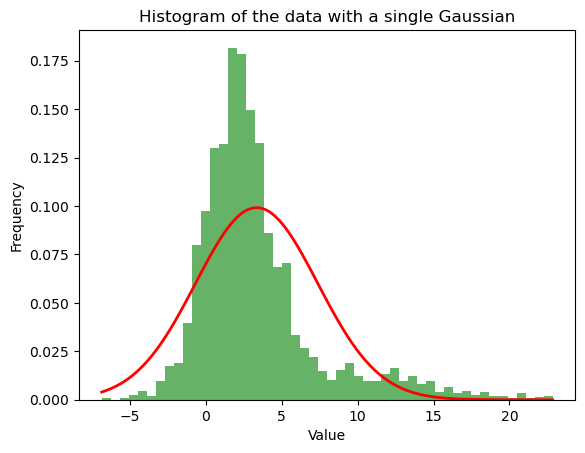

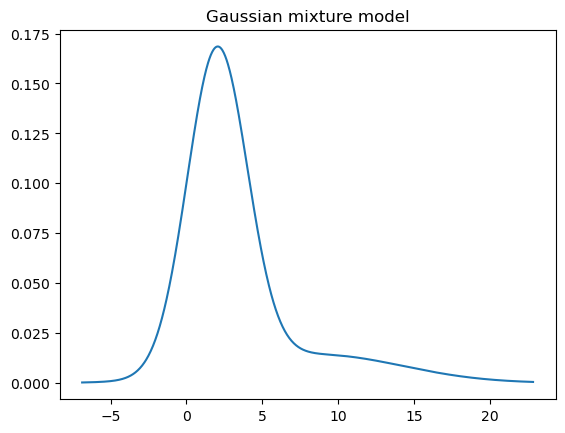

In [27]:
# generate data
random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

# estimate parameters
mu = np.mean(data)
sigma = np.std(data)
print("mu: {:.2f}".format(mu))
print("sigma: {:.2f}".format(sigma))

# plot histogram
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')
plt.title("Histogram of the data with a single Gaussian")
plt.xlabel("Value")
plt.ylabel("Frequency")

# plot Gaussian pdf
g = Gaussian(mu, sigma)
x = np.linspace(np.min(data), np.max(data), 100)
y = g.pdf(x)
plt.plot(x, y, color='r', linewidth=2)

plt.show()

# Create GaussianMixture_self object
gmm = GaussianMixture_self(data)
# Iterate EM algorithm
gmm.iterate(N=100)

# Plot PDF
x = np.linspace(min(data), max(data), 1000)
y = [gmm.pdf(i) for i in x]
plt.plot(x, y)
plt.title("Gaussian mixture model")
plt.show()

# Thanks for grading ^_^